# T20 Cricket Score Predictor: Leveraging Machine Learning with Streamlit 🏏

Embark on a journey into the realm of T20 cricket score prediction, where data meets the excitement of the game. This project harnesses the power of machine learning to develop a robust model capable of forecasting T20 cricket scores with precision. Join us as we delve into data preprocessing, advanced modeling techniques, and user-friendly interfaces to revolutionize decision-making in the fast-paced world of cricket.

In this project, we utilize libraries like pandas, pickle, numpy, and powerful models such as RandomForestRegressor and XGBoost, we aim to develop a robust predictive model. Additionally, we enhance user interaction and accessibility by integrating the project with Streamlit, providing an intuitive and seamless user interface for exploring T20 cricket score predictions.

In [1]:
import pandas as pd
import pickle 
import numpy as np

In [2]:
df = pd.read_csv("t20_wc.csv")

In [3]:
df.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


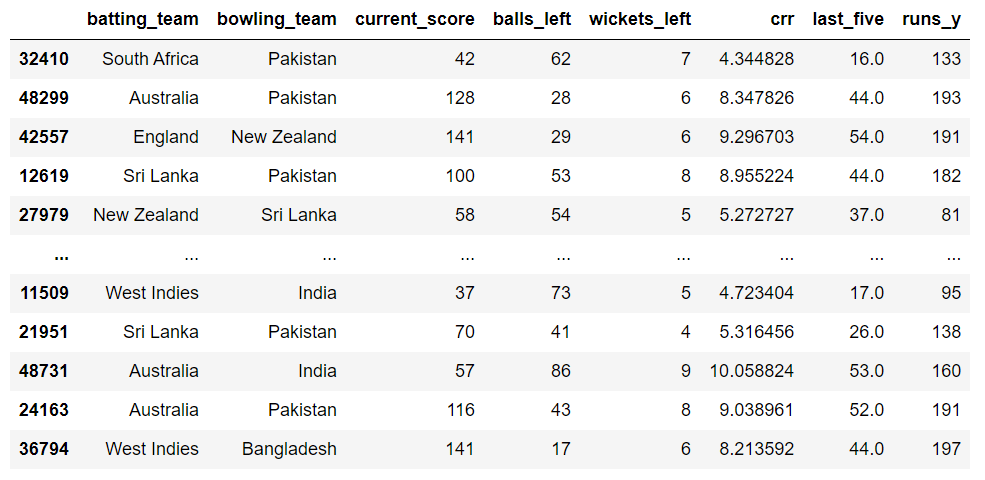

In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df.shape

(63888, 8)

In [6]:
df["venue"]

0        Melbourne Cricket Ground
1        Melbourne Cricket Ground
2        Melbourne Cricket Ground
3        Melbourne Cricket Ground
4        Melbourne Cricket Ground
                   ...           
63883         R Premadasa Stadium
63884         R Premadasa Stadium
63885         R Premadasa Stadium
63886         R Premadasa Stadium
63887         R Premadasa Stadium
Name: venue, Length: 63888, dtype: object

In [7]:
df[df["city"].isnull()]

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
63757,963,Australia,Sri Lanka,19.2,1,0,NaN,Pallekele International Cricket Stadium
63758,963,Australia,Sri Lanka,19.3,4,0,NaN,Pallekele International Cricket Stadium
63759,963,Australia,Sri Lanka,19.4,4,0,NaN,Pallekele International Cricket Stadium
63760,963,Australia,Sri Lanka,19.5,6,0,NaN,Pallekele International Cricket Stadium


In [8]:
df[df["city"].isnull()]["venue"].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [9]:
# we can get first value from lambda function or either from get function

In [10]:
# 1-from lembda function
df["venue"].str.split().apply(lambda x: x[0])

0        Melbourne
1        Melbourne
2        Melbourne
3        Melbourne
4        Melbourne
           ...    
63883            R
63884            R
63885            R
63886            R
63887            R
Name: venue, Length: 63888, dtype: object

In [11]:
#2-from get function 
df["venue"].str.split().str.get(0)

0        Melbourne
1        Melbourne
2        Melbourne
3        Melbourne
4        Melbourne
           ...    
63883            R
63884            R
63885            R
63886            R
63887            R
Name: venue, Length: 63888, dtype: object

In [12]:
df.shape

(63888, 8)

In [13]:
df["city"] = df["city"].mask(df["city"].isnull(), df["venue"].str.split().str.get(0))

In [14]:
df[df["city"].isnull()]["venue"].value_counts()

Series([], Name: venue, dtype: int64)

In [15]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [16]:
df.drop(columns = ["venue"], inplace = True)

In [17]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [18]:
df["city"].unique()

array(['Melbourne', 'Victoria', 'Adelaide', 'Napier', 'Mount Maunganui',
       'Auckland', 'Southampton', 'Taunton', 'Cardiff',
       'Chester-le-Street', 'Kanpur', 'Nagpur', 'Bangalore', 'Lauderhill',
       'Dubai', 'Abu Dhabi', 'Sydney', 'Hobart', 'Wellington', 'Hamilton',
       'Bloemfontein', 'Potchefstroom', 'Barbados', 'Trinidad', 'Colombo',
       'St Kitts', 'Jamaica', 'Nelson', 'Ranchi', 'Birmingham',
       'Manchester', 'Bristol', 'Delhi', 'Rajkot', 'Thiruvananthapuram',
       'Lahore', 'Johannesburg', 'Centurion', 'Cape Town', 'Cuttack',
       'Indore', 'Mumbai', 'Dhaka', 'Sylhet', 'Karachi', 'Harare',
       'Carrara', 'Brisbane', 'Dehradun', 'Kolkata', 'Lucknow', 'Chennai',
       'Gros Islet', 'Basseterre', 'Visakhapatnam', 'Bengaluru',
       'Canberra', 'Perth', 'East London', 'Durban', 'Port Elizabeth',
       'Chandigarh', 'Hyderabad', 'Christchurch', 'Providence', 'Kandy',
       'Chattogram', 'Pune', 'Paarl', 'London', 'Nairobi', 'Nottingham',
       'King Ci

### Data Filtering
* 5 innings played

In [19]:
(6*20)*5

600

In [20]:
eligible_cities = df["city"].value_counts()
eligible_cities

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [21]:
eligible_cities = eligible_cities[eligible_cities > 600].index.tolist()

In [22]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

In [23]:
df = df[df["city"].isin(eligible_cities)]
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [24]:
df.groupby("match_id")["runs"].cumsum().iloc[115:150]

115    153
116    153
117    154
118    158
119    158
120    160
121    161
122    162
123    164
124    168
248      0
249      0
250      0
251      0
252      1
253      1
254      2
255      8
256      9
257      9
258     13
259     14
260     15
261     15
262     19
263     20
264     21
265     21
266     25
267     26
268     27
269     31
270     31
271     31
272     35
Name: runs, dtype: int64

In [25]:
df["current_score"] = df.groupby("match_id")["runs"].cumsum()

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\4248034878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["current_score"] = df.groupby("match_id")["runs"].cumsum()


In [26]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [27]:
df["over"] = df["ball"].astype(int)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1350928344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["over"] = df["ball"].astype(int)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0
...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19


In [28]:
df["ball_no"] = df["ball"].astype(str).str.extract("\d.(\d)").astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\536658437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ball_no"] = df["ball"].astype(str).str.extract("\d.(\d)").astype(int)


In [29]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [30]:
df["total_delivers"] = (df["over"]*6) + df["ball_no"] # 5.2

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\226372057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_delivers"] = (df["over"]*6) + df["ball_no"] # 5.2


In [31]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [32]:
df["balls_left"] = 120 - df["total_delivers"]

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\3191768547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balls_left"] = 120 - df["total_delivers"]


In [33]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [34]:
df["balls_left"].mask(df["balls_left"] < 0, 0, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1038864737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balls_left"].mask(df["balls_left"] < 0, 0, inplace = True)


In [35]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [36]:
df["player_dismissed"].unique()

array(['0', 'M Klinger', 'AJ Finch', 'MC Henriques', 'TM Head',
       'AJ Turner', 'TD Paine', 'BR Dunk', 'JP Faulkner', 'L Ronchi',
       'KS Williamson', 'CJ Anderson', 'C Munro', 'C de Grandhomme',
       'JDS Neesham', 'MJ Santner', 'TC Bruce', 'Q de Kock',
       'F du Plessis', 'HM Amla', 'AB de Villiers', 'F Behardien',
       'JP Duminy', 'JT Smuts', 'RR Hendricks', 'DA Miller', 'JJ Roy',
       'AD Hales', 'DJ Malan', 'SW Billings', 'LS Livingstone',
       'LE Plunkett', 'JC Buttler', 'DJ Willey', 'V Kohli', 'SK Raina',
       'Yuvraj Singh', 'KL Rahul', 'MK Pandey', 'HH Pandya', 'A Mishra',
       'MS Dhoni', 'J Charles', 'AD Russell', 'E Lewis', 'CR Brathwaite',
       'KA Pollard', 'LMP Simmons', 'MN Samuels', 'ADS Fletcher',
       'DJ Bravo', 'S Badree', 'N Pooran', 'SP Narine', 'JE Taylor',
       'Sharjeel Khan', 'Babar Azam', 'Khalid Latif', 'Shoaib Malik',
       'CAK Walton', 'MJ Guptill', 'TA Blundell', 'LRPL Taylor',
       'TG Southee', 'IS Sodhi', 'JM Vince', 

In [37]:
df["player_dismissed"] = df["player_dismissed"].mask(df["player_dismissed"] != "0", 1).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\2603018163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["player_dismissed"] = df["player_dismissed"].mask(df["player_dismissed"] != "0", 1).astype(int)


In [38]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,1,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [39]:
df["player_dismissed"] = df.groupby("match_id")["player_dismissed"].cumsum()

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\3595609500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["player_dismissed"] = df.groupby("match_id")["player_dismissed"].cumsum()


In [40]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0


In [41]:
df["wickets_left"] = 10 - df["player_dismissed"]

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\2835093938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wickets_left"] = 10 - df["player_dismissed"]


In [42]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [43]:
df["crr"] = (df["current_score"]*6)/df["total_delivers"]

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1867300620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["crr"] = (df["current_score"]*6)/df["total_delivers"]


In [44]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [45]:
total_run_table = df.groupby(["match_id"])["runs"].sum().reset_index()
total_run_table

,match_id,runs
0,2,168
1,4,187
2,10,195
3,11,194
4,12,185
...,...,...
411,958,129
412,960,150
413,961,120
414,963,263


In [46]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [47]:
df = df.merge(total_run_table, on = "match_id")

In [48]:
df

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left,crr,runs_y
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,168
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,168
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,168
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,168
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,128
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,128
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,128
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,128


In [49]:
df

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left,crr,runs_y
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,168
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,168
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,168
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,168
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,128
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,128
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,128
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,128


In [50]:
df["last_five"] = df.groupby("match_id")["runs_x"].rolling(window=30).sum().values.tolist()

In [51]:
df

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wickets_left,crr,runs_y,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,168,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,168,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,168,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,168,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,128,32.0
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,128,32.0
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,128,32.0
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,128,33.0


In [52]:
df.columns

Index(['match_id', 'batting_team', 'bowling_team', 'ball', 'runs_x',
       'player_dismissed', 'city', 'current_score', 'over', 'ball_no',
       'total_delivers', 'balls_left', 'wickets_left', 'crr', 'runs_y',
       'last_five'],
      dtype='object')

In [53]:
final_df = df[['batting_team', 'bowling_team','current_score','balls_left', 'wickets_left', 'crr', 'last_five','runs_y']]

In [54]:
final_df

,batting_team,bowling_team,current_score,balls_left,wickets_left,crr,last_five,runs_y
0,Australia,Sri Lanka,0,119,10,0.000000,NaN,168
1,Australia,Sri Lanka,0,118,10,0.000000,NaN,168
2,Australia,Sri Lanka,1,117,10,2.000000,NaN,168
3,Australia,Sri Lanka,3,116,10,4.500000,NaN,168
4,Australia,Sri Lanka,3,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,127,0,1,6.350000,33.0,128


In [55]:
final_df.isnull().sum()

batting_team         0
bowling_team         0
current_score        0
balls_left           0
wickets_left         0
crr                  0
last_five        12024
runs_y               0
dtype: int64

In [56]:
final_df.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [57]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_y           0
dtype: int64

In [58]:
final_df

,batting_team,bowling_team,current_score,balls_left,wickets_left,crr,last_five,runs_y
29,Australia,Sri Lanka,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,45,86,10,7.941176,42.0,168
...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,127,0,1,6.350000,33.0,128


In [59]:
final_df.sample(10)

,batting_team,bowling_team,current_score,balls_left,wickets_left,crr,last_five,runs_y
13843,South Africa,England,63,78,9,9.000000,54.0,179
23477,New Zealand,Sri Lanka,170,1,7,8.571429,47.0,170
47836,Bangladesh,Australia,156,0,5,7.800000,51.0,156
27590,Australia,England,68,75,10,9.066667,54.0,157
23051,Bangladesh,West Indies,65,55,4,6.000000,22.0,118
42872,Australia,South Africa,41,87,9,7.454545,37.0,144
15458,West Indies,South Africa,78,71,10,9.551020,49.0,205
35010,India,Sri Lanka,155,0,7,7.750000,35.0,155
11628,India,West Indies,60,79,10,8.780488,51.0,167
43691,South Africa,Bangladesh,141,10,6,7.690909,27.0,169


# Sampling the Dataset

This code randomly samples the entire dataset, ensuring that each row has an equal chance of being selected. Sampling the dataset in this manner helps maintain the representativeness of the data and prevents bias in subsequent analyses or modeling tasks.

In [60]:
# to shuffle and to avoid biasness use sample
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,current_score,balls_left,wickets_left,crr,last_five,runs_y
47303,South Africa,England,132,51,8,11.478261,44.0,229
7492,Bangladesh,West Indies,43,85,6,7.371429,37.0,143
26912,Pakistan,New Zealand,144,7,4,7.646018,34.0,161
37363,Australia,England,68,67,8,7.698113,44.0,195
47078,Pakistan,Bangladesh,139,29,8,9.164835,49.0,201
...,...,...,...,...,...,...,...,...
45980,Pakistan,New Zealand,51,68,8,5.884615,22.0,168
37098,South Africa,Sri Lanka,23,85,7,3.942857,17.0,115
26323,Australia,England,144,2,4,7.322034,52.0,147
28054,Pakistan,South Africa,31,85,7,5.314286,24.0,120


# Preparing Data for Modeling

Here's the code to prepare the data for modeling. We're splitting the dataset into training and testing sets and applying transformations using pipelines and transformers to ensure our features are ready for our machine learning models.


In [61]:
X = final_df.drop(columns = ['runs_y'])
y = final_df['runs_y']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [65]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse = False),['batting_team' , 'bowling_team'])
                        ],
    remainder = 'passthrough')

# Model Pipeline Configuration

Here's the pipeline configuration for our model. It includes steps for data transformation using ColumnTransformer and StandardScaler, followed by the XGBoost regressor with specified hyperparameters. This pipeline encapsulates the entire process from data preprocessing to model training, making our workflow efficient and reproducible.

In [66]:
pipe = Pipeline(steps = [
     ('step1' , trf),
     ('step2' , StandardScaler()),
     ('step3' , XGBRegressor(n_estimators = 1000, learning_rate = 0.2, max_depth=12, random_state=1))
                        ])

# Model Evaluation

After fitting our pipeline to the training data and making predictions on the test data, here are the evaluation metrics for our model: R-squared score and Mean Absolute Error. These metrics provide insights into how well our model is performing in predicting T20 cricket scores.

In [67]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9501257801258753
3.5933723122563035


# Saving the Trained Model

This section involves saving the trained pipeline model using pickle. By doing so, we preserve the entire pipeline, including preprocessing steps and the trained XGBoost regressor, for future use without needing to retrain the model.

In [68]:
pickle.dump(pipe, open ('pipe.pkl' , 'wb'))

In [69]:
final_df['batting_team'].unique()

array(['Australia', 'New Zealand', 'South Africa', 'England', 'India',
       'West Indies', 'Pakistan', 'Bangladesh', 'Afghanistan',
       'Sri Lanka'], dtype=object)

In [70]:
df['city'].unique().tolist()

['Melbourne',
 'Adelaide',
 'Mount Maunganui',
 'Auckland',
 'Southampton',
 'Cardiff',
 'Nagpur',
 'Bangalore',
 'Lauderhill',
 'Dubai',
 'Abu Dhabi',
 'Sydney',
 'Wellington',
 'Hamilton',
 'Barbados',
 'Trinidad',
 'Colombo',
 'St Kitts',
 'Manchester',
 'Delhi',
 'Lahore',
 'Johannesburg',
 'Centurion',
 'Cape Town',
 'Mumbai',
 'Kolkata',
 'Durban',
 'Chandigarh',
 'Christchurch',
 'London',
 'Nottingham',
 'St Lucia',
 'Pallekele',
 'Mirpur',
 'Chittagong']